In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.0/98.0 kB 8.6 MB/s eta 0:00:00


In [4]:
import osmnx as ox
import networkx as nx
import pickle
import os
from google.colab import drive

In [5]:
# connect to drive
drive.mount('/gdrive')

path = '/gdrive/MyDrive/berlin_bike_CV/'
folder = 'metadata'
tile_folder = 'labeled_tiles'

name = 'DSR'

Mounted at /gdrive


# Load Graph

In [53]:
# load graph
graph_name = '_graph_origin.pkl'
graph_path = os.path.join(path, folder, name + graph_name)

with open(graph_path, 'rb') as pickle_file:
    G = pickle.load(pickle_file)

# load tiles edges file for tiles
file_name = '_tiles_edges.pkl'
file_path = os.path.join(path, folder, name + file_name)
with open(file_path, 'rb') as pickle_file:
    tiles_edges = pickle.load(pickle_file)
tiles = list(tiles_edges.keys())
print(tiles)

['12021023233301', '12021023233303', '12021023233321', '12021023233323', '12021023233310', '12021023233312', '12021023233330', '12021023233332', '12021023233311', '12021023233313', '12021023233331', '12021023233333', '12021023322200', '12021023322202', '12021023322220', '12021023322222']


In [54]:
# defining edge weights
edge_weight = 'edge_weight'
# TODO: define default
default_value = 100
edge_colour = 'edge_colour'
# TODO: define color
default_color = 'grey'

In [55]:
# applying edge attribute
nx.set_edge_attributes(G, default_value, name=edge_weight)
nx.set_edge_attributes(G, default_color, name=edge_colour)

In [74]:
def lookup_weight(label):
  weight = int(100)
  if label == 0:
    weight = 10
  elif label == 1:
    weight = 5
  elif label == 2:
    weight = 1
  elif label == 3:
    weight = 2
  else:
    weight = 100

    # TODO: define the value for the street
  return weight

In [60]:
def lookup_colour(weight):

  # TODO: define color_lookup
  clr = 'white'
  if weight == 10:
    clr = 'red'
  elif weight == 5:
    clr = 'blue'
  elif weight == 1:
    clr = 'yellow'
  elif weight == 2:
    clr = 'green'
  else:
    clr = 'white'
  return clr

In [75]:
# load labeled edges per tile
for tile_quadkey in tiles:
  tile_path = os.path.join(path, tile_folder, tile_quadkey + '_labeled.pkl')
  if os.path.exists(tile_path):
    with open(tile_path, 'rb') as pickle_file:
      tiles_labeled = pickle.load(pickle_file)

    for edge, value in tiles_labeled.items():
      if value:
        weight = lookup_weight(value[0]['label'])
        color = lookup_colour(weight)
        G.edges[edge][edge_weight] = weight
        G.edges[edge][edge_colour] = color

In [77]:
# save graph with weights
graph_name = '_graph_weights.pkl'
graph_path = os.path.join(path, folder, name + graph_name)
with open(graph_path, 'wb') as pickle_file:
    pickle.dump(G, pickle_file)

In [78]:
# with open(graph_path, 'rb') as pickle_file:
#     G = pickle.load(pickle_file)


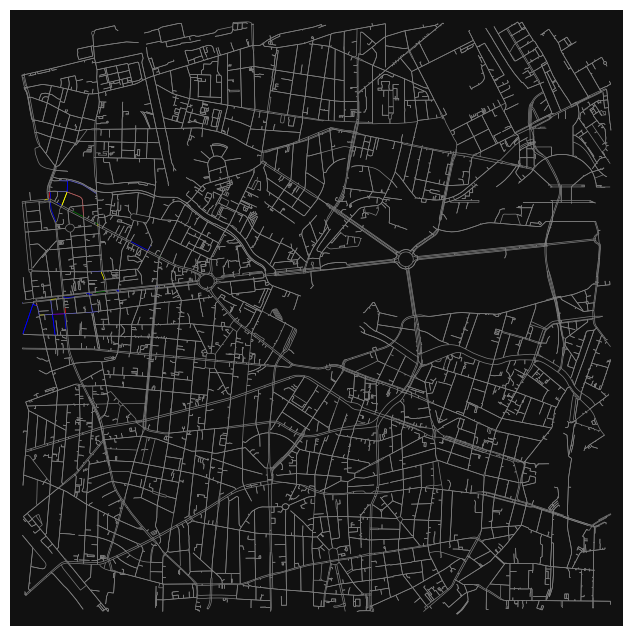

In [79]:
# ec = nx.get_edge_attributes(G, name=edge_colour)
# fig, ax = ox.plot_graph(G, edge_color=list(ec.values()), edge_linewidth=0.5, node_size=0)